<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/%ED%95%B4%EC%84%A4/ch01_02_DNN%EA%B8%B0%EC%B4%88_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EB%A5%BC%EC%9D%B4%EC%9A%A9%ED%95%9C%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01_02_DNN기초-텐서플로우를 이용한 모델링

---
* 날짜:
* 이름:

## 학습내용
    - 텐서플로우를 이용해 모델을 구현한다.
    - 생성한 모델을 이용해 순전파 계산을 진행한다.
    - 텐서플로우로 모델을 구현하는 여러 방법에 대핼 배워본다. 

## 학습자료


- 케라스 창시자에게 배우는 딥러닝
- 텐서플로우 케라스 : https://www.tensorflow.org/?hl=ko


In [2]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.8.2'

## DNN 기본 이해
---


### | 모델링 (1)


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-01.png?raw=true width=450>
</p>


#### **모델 구현**

In [17]:
# 모든 레이어는 tensorflow.keras에 있다.
from tensorflow.keras import layers, models

x = layers.Input(shape=(3), name='input_layer') # X : (데이터개수,3)
y = layers.Dense(1, name='output_layer')(x) # Linear : W, b  Dense(output_shape)

model1 = models.Model(inputs=x, outputs=y, name='Model_1')

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


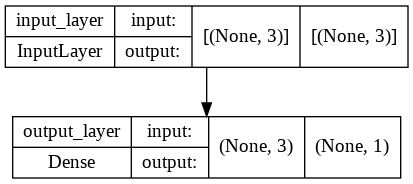

In [18]:
from tensorflow.keras import  utils

# Output shape : 데이터 변환 과정
# None: 데이터 개수
# Param # : 파라미터 개수 
model1.summary()
utils.plot_model(model1, show_shapes=True)

# Trainable param : 학습 가능한 파라미터 (역전파 통해서 업데이트)
# Non-trainable param : 학습 하지 않는 파라미터

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-04.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `model.layers.output`


In [21]:
# output : 데이터의 변환 과정
for layer in model1.layers:
  print(layer.name) # 각 레이어의 이름
  print(layer.output.shape) # 각 레이어의 아웃풋의 shape

input_layer
(None, 3)
output_layer
(None, 1)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [23]:
'''
W : (3, 1)
B : (1, )
'''
for param in model1.get_weights():
  print(param.shape)

print(model1.get_weights())

(3, 1)
(1,)
[array([[-0.9689194],
       [-1.1926752],
       [-0.9774102]], dtype=float32), array([0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [25]:
X = np.random.normal(size=(1,3))
print(X) 
Y_pred = model1.predict(X)
print(Y_pred)

[[1.20658452 2.46913639 1.81547424]]
[[-5.8884244]]


### | 모델링 (2)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-02.png?raw=true width=450>
</p>


#### **모델 구현**

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-05.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

### | 모델링 (3)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-03.png?raw=true width=550>
</p>


#### **모델 구현**

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-06.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

### | 모델링 (4)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-12.png?raw=true width=820>

#### **모델 구현**

Model: "Model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_17 (Dense)            (None, 8)                 40        
                                                                 
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dense_19 (Dense)            (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


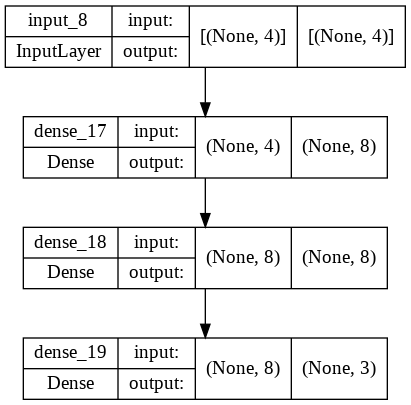

In [31]:
from tensorflow.keras import layers, models, utils

x = layers.Input(shape=(4,))
z1 = layers.Dense(8)(x)
z2 = layers.Dense(8)(z1)
y = layers.Dense(3)(z2)
model4 = models.Model(inputs=x, outputs=y, name='Model_4')

model4.summary()
utils.plot_model(model4, show_shapes=True)

#### **파라미터** 



* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



In [32]:
'''
X : (N,4) N은 데이터 개수
Z1: (N,8)
Z2: (N,8)
Y : (N,3)
'''

for layer in model4.layers:
  print(layer.output.shape)

(None, 4)
(None, 8)
(None, 8)
(None, 3)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [35]:
'''
W1 : (4, 8)
B1 : (8,)
W2 : (8, 8)
B2 : (8,)
W3 : (8, 3)
B3 : (3,)
'''

for param in model4.get_weights():
  print(param.shape)

print(model4.get_weights())

(4, 8)
(8,)
(8, 8)
(8,)
(8, 3)
(3,)
[array([[-0.48081106, -0.01514709, -0.66533655,  0.39273983,  0.18107164,
         0.32026476, -0.66464704, -0.24319422],
       [ 0.43796474, -0.6072326 ,  0.30275685,  0.37262672, -0.4266768 ,
        -0.28687388, -0.25253245,  0.65866643],
       [ 0.44402415,  0.65320295,  0.37057072,  0.4302917 ,  0.3375196 ,
        -0.3924959 , -0.06728005,  0.5837192 ],
       [-0.21683103, -0.55390805, -0.11064744, -0.2487812 ,  0.5847742 ,
        -0.5747362 ,  0.09586418, -0.01536238]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[ 0.5822814 , -0.40241706, -0.5196391 , -0.30628973,  0.13604665,
         0.24014646,  0.2925563 ,  0.25694972],
       [ 0.10019422,  0.42793983,  0.38329387, -0.2762451 ,  0.10510159,
         0.4790166 , -0.26147664,  0.44555134],
       [-0.5514267 ,  0.22323298,  0.60897285, -0.5648585 , -0.13940465,
        -0.09059083, -0.48304057,  0.02238017],
       [ 0.40160352,  0.5452947 , -0.532019

#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [39]:
X = np.random.normal(size=(1,4))
Y_pred = model4.predict(X)
print('X:', X, X.shape)
print('Y_pred:', Y_pred, Y_pred.shape)

X: [[ 0.35765377 -1.20751405  1.68662387  1.62310732]] (1, 4)
Y_pred: [[ 0.471414  -0.8348682 -1.453306 ]] (1, 3)


### | 병렬연산


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-13.png?raw=true width=820>



#### **순전파 계산**

Model4를 이용하여 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요. X의 샘플 개수는 10개 입니다.
* `np.random.normal`

In [40]:
# 실제 데이터  (1000~100000 중에 배치 단위로 계산이 진행됨 ) 배치 사이즈 : 8, 16, 32, 64, ...
X = np.random.normal(size=(10,4)) # 배치의 개수가 10개다
Y_pred = model4.predict(X)
print('X:', X, X.shape)
print('Y_pred:', Y_pred, Y_pred.shape)

X: [[ 0.68333594  1.08975742  0.06377832 -0.74112108]
 [-1.84930285 -0.78168465 -0.95594566 -0.85940538]
 [ 1.70745574 -0.07431103 -0.10431133 -0.24341815]
 [ 0.7605285   1.51839484 -0.69121864  0.64243456]
 [-0.09336639  1.51467012 -0.36382809 -1.51646702]
 [ 0.25330329 -0.95819492  0.22709436 -0.43195969]
 [ 1.26083022 -0.19277182  1.52747238 -0.72832452]
 [ 1.04710424 -0.58231513 -1.4183134   0.76512093]
 [ 1.15203337  0.968229   -0.7401269   1.80273105]
 [-1.98926649 -0.49397515 -0.82279036 -0.01237459]] (10, 4)
Y_pred: [[-0.29485393  0.24285269 -0.1954884 ]
 [ 0.42902985  0.75496376  1.3432294 ]
 [-1.0487369   0.05211186 -0.2085585 ]
 [-0.3386363  -0.6523217   0.02973157]
 [-0.06380153  0.6987903   0.36152065]
 [-0.2805176   0.38364327 -0.00591813]
 [-0.28556794  0.37671834 -1.2176193 ]
 [-1.0943506  -0.4291797   0.77565366]
 [-0.49165052 -1.2939804  -0.15293688]
 [ 0.7322984   0.21025252  1.075386  ]] (10, 3)


## 텐서플로우 - 모델을 만드는 세가지 방법
---

1. keras Sequential API
2. Keras Functional API
3. Model Class Subsclassing


In [41]:
import tensorflow as tf
from tensorflow.keras import models, layers, utils
import numpy as np
tf.__version__

'2.8.2'

아래 그림과 같은 모델을 텐서플로우를 이용해서 만들어 봅시다.

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel1.PNG?raw=true width=600>

### | Keras Functional API

* 모델 구현

In [46]:
# 이 함수를 실행하면 아래와 같은 구성을 가진 모델이 반환
def build_model1():
  x = layers.Input(shape=(3,))
  y = layers.Dense(6)(x)
  y = layers.Dense(6)(y)
  y = layers.Dense(1)(y)
  model = models.Model(x, y)
  return model

* 시각화

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_26 (Dense)            (None, 6)                 24        
                                                                 
 dense_27 (Dense)            (None, 6)                 42        
                                                                 
 dense_28 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


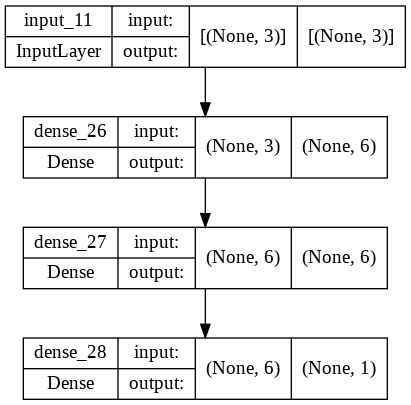

In [48]:
m1 = build_model1()
m1.summary()
utils.plot_model(m1, show_shapes=True)

### | Keras Sequential API



* 모델 구현: `Sequential()`

In [49]:
def build_model2():
  model = tf.keras.Sequential() # 빈 껍질을 만들어 놓은것
  model.add( layers.Input(shape=(3,)) )
  model.add( layers.Dense(6))
  model.add( layers.Dense(6))
  model.add( layers.Dense(1))
  return model

* 모델 시각화

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 6)                 24        
                                                                 
 dense_30 (Dense)            (None, 6)                 42        
                                                                 
 dense_31 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


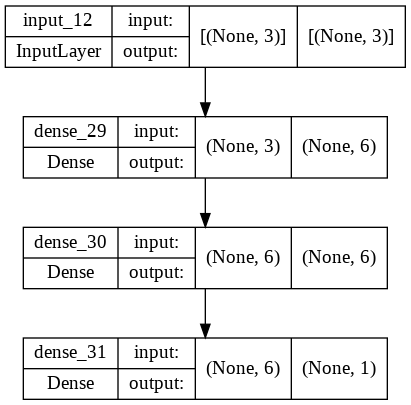

In [50]:
m2 = build_model2()
m2.summary()
utils.plot_model(m2, show_shapes=True)

### | Model Class Subclassing

* 모델 구현

In [51]:
class Model3(tf.keras.Model): # 이미 존재하는 클래스를 불러올때
  def __init__(self):
    super(Model3, self).__init__() # tf.keras.Model에 이미 정의되어 있는 (init)파라미터 불러오기
    self._name = 'Model3'
    self._input_shape=(3)
    self.dense1 = layers.Dense(6, name='dense1')
    self.dense2 = layers.Dense(6, name='dense2')
    self.dense3 = layers.Dense(3, name='dense3')
  
  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    return y

* 모델 시각화

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  24        
                                                                 
 dense2 (Dense)              multiple                  42        
                                                                 
 dense3 (Dense)              multiple                  21        
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


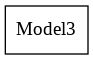

In [54]:
m3 = Model3()
m3(np.array([[1,2,1]]))
m3.summary()
utils.plot_model(m3)

### | 예제

세가지 방법을 이용해 아래 모델을 구현하세요.

#### **예제 01**

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel2.PNG?raw=true width=500>


* Keras Functional API


* keras Sequential API


* Model Class Subsclassing




#### **예제 02**




<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel3.PNG?raw=true width=700>


* Keras Functional API


* keras Sequential API


* Model Class Subsclassing

